#### SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION

####  Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data_for_analysis.csv')

# Display the column names to verify correctness
print(df.columns)
print(df.head())
print(df.tail())

Index(['GDP_percapitaUSD', 'Life_exp', 'Ext_debt', 'Age_dep_ratio',
       'Population', 'CBR', 'Access_fuels_cooking', 'Access_electricity',
       'infant_mortality', 'neonatal_deaths'],
      dtype='object')
   GDP_percapitaUSD  Life_exp     Ext_debt  Age_dep_ratio  Population     CBR  \
0       2728.022788    37.371  836680592.1      79.636574    44928342  46.107   
1         97.420968    37.673  836680592.1      79.603584    45855507  46.243   
2        104.852749    37.809  836680592.1      79.679816    46821845  46.426   
3        108.015742    38.192  836680592.1      80.003736    47822569  46.421   
4        113.658375    38.415  836680592.1      80.639721    48856332  46.463   

   Access_fuels_cooking  Access_electricity  infant_mortality  neonatal_deaths  
0                   0.0                 2.0        202.250894      140975.5720  
1                   0.1                 3.0        200.385976      143289.3341  
2                   0.1                 4.0        198.5210

#### Summary / Descriptive statistics

In [3]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x2539,x2540,x2541,x2542,x2543,x2544,x2545,x2546,x2547,x2548
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,0.667917,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,0.471071,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,0.000000,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,0.000000,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,1.000000,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,1.000000,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,1.000000,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [9]:
df.size

In [4]:
df.shape

(2132, 2549)

### Convert y series numerical data into binary values

In [4]:
# Define a threshold for binary conversion
threshold = 2000

# Convert 'GDP_percapitaUSD' to binary (0 or 1) based on the threshold
df['GDP_binary'] = (df['GDP_percapitaUSD'] >= threshold).astype(int)

# Display the DataFrame with binary conversion
df['GDP_binary'] 

0      1
1      0
2      0
3      0
4      0
      ..
184    1
185    1
186    0
187    1
188    1
Name: GDP_binary, Length: 189, dtype: int32

#### Split the dataset into training and testing sets

In [6]:
## Assuming 'df' contains the dataset with feature variables and target variable 'y'

# Extracting selected features (columns 2 to 10)

selected_features = df.iloc[:, 1:10]  # Assuming columns 2 to 2549 are your feature variables

# Extracting the target variable 'y'
y = df['GDP_binary']
target_variable = df['GDP_binary']  # Assuming 'y' is the name of your target variable column

# Splitting the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=123)

#### Data normalisation

In [8]:
# Performing data normalisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# scaling the training set
X_train=sc.fit_transform(X_train)

#scaling the test set
X_test=sc.transform (X_test)

#### Training the SVM model 

In [9]:
# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize the SVM classifier with a polynomial kernel
svm_model = svm.SVC(kernel='linear', C = 1)  # degree=3 for cubic polynomial

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

In [17]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


#### Confusion matrix

In [11]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
### Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # note that y_test is the actual or true data
print(cm)

[[30  1]
 [ 0  7]]


#### The confusion matrix

\begin{array}{c|c|c|}
& \text{Predicted Class 0 (Negative)} & \text{Predicted Class 1 (Positive)} \\
\hline
\text{Actual Class 0 (Negative)} & 30 & 1 \\
\hline
\text{Actual Class 1 (Positive)} & 0 & 7 \\
\end{array}

Interpretation of the confusion matrix:
- **True Negative (TN):** There are 30 instances where the model correctly predicted the GDP per capita trend to be below the threshold (Class 0 - Negative) when it was actually below the threshold.
- **False Positive (FP):** There is 1 instance where the model incorrectly predicted the GDP per capita trend to be above the threshold (Class 1 - Positive) when it was actually below the threshold.
- **False Negative (FN):** There are 0 instances where the model incorrectly predicted the GDP per capita trend to be below the threshold (Class 0 - Negative) when it was actually above the threshold.
- **True Positive (TP):** There are 7 instances where the model correctly predicted the GDP per capita trend to be above the threshold (Class 1 - Positive) when it was actually above the threshold.

This confusion matrix helps evaluate the performance of a binary classifier (e.g., Random Forest) in predicting GDP per capita trends as either below or above the threshold. It shows that the model has a high number of true negatives and true positives, indicating a good ability to correctly classify instances into their respective classes. There is only one false positive, suggesting a minor area of improvement for the model.


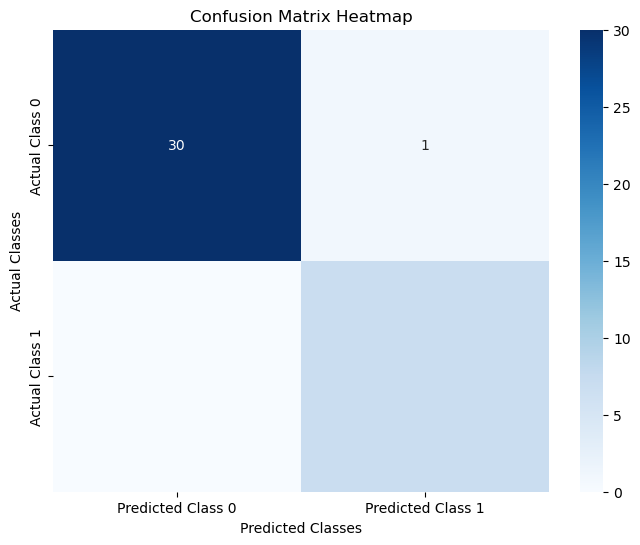

In [15]:
# Example confusion matrix data
confusion_matrix_data = {
    'Predicted Class 0': [30, 0],
    'Predicted Class 1': [1, 7]
}

# Convert the confusion matrix data to a DataFrame
df_confusion_matrix = pd.DataFrame(confusion_matrix_data, index=['Actual Class 0', 'Actual Class 1'])

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


#### Classification report

In [18]:
# classification report
class_rept = classification_report(y_test, y_pred)
#print(f"class_rept: {Classification report}")
print(class_rept)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.88      1.00      0.93         7

    accuracy                           0.97        38
   macro avg       0.94      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



#### Classification report

\begin{array}{c|c|c|c|c|}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.97 & 0.98 & 31 \\
1 & 0.88 & 1.00 & 0.93 & 7 \\
\hline
\text{Accuracy} & & & 0.97 \\
\text{Macro Avg} & 0.94 & 0.98 & 0.96 & 38 \\
\text{Weighted Avg} & 0.98 & 0.97 & 0.97 & 38 \\
\end{array}

Interpretation of the classification report:
- **Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model.
  - Class 0: Precision of 1.00 (100%) means that when the model predicts a GDP per capita trend to be below the threshold (Class 0), it is correct 100% of the time.
  - Class 1: Precision of 0.88 (88%) means that when the model predicts a GDP per capita trend to be above the threshold (Class 1), it is correct 88% of the time.

- **Recall (Sensitivity):** Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
  - Class 0: Recall of 0.97 (97%) means that the model correctly identifies 97% of instances of GDP per capita trends below the threshold (Class 0) out of all actual instances of Class 0.
  - Class 1: Recall of 1.00 (100%) means that the model captures 100% of instances of GDP per capita trends above the threshold (Class 1) out of all actual instances of Class 1.

- **F1-Score:** F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance.
  - Class 0: F1-Score of 0.98 (98%) combines the precision and recall for Class 0, providing a single metric that balances both aspects.
  - Class 1: F1-Score of 0.93 (93%) combines the precision and recall for Class 1, providing a single metric that balances both aspects.

- **Support:** Support represents the number of actual occurrences of each class in the dataset.
  - Class 0: Support of 31 indicates there are 31 instances of GDP per capita trends below the threshold (Class 0) in the dataset.
  - Class 1: Support of 7 indicates there are 7 instances of GDP per capita trends above the threshold (Class 1) in the dataset.

- **Accuracy:** Overall accuracy of 0.97 (97%) indicates that the model correctly predicts the GDP per capita trend (either below or above the threshold) 97% of the time across all instances in the dataset.
  
- **Macro Avg:** Macro average precision, recall, and F1-score provide the average performance across classes without considering class imbalance. In this case, it shows an average precision of 0.94 (94%), recall of 0.98 (98%), and F1-score of 0.96 (96%) across both classes.

- **Weighted Avg:** Weighted average precision, recall, and F1-score provide the average performance across classes while considering class imbalance. In this case, it shows a weighted average precision of 0.98 (98%), recall of 0.97 (97%), and F1-score of 0.97 (97%) across both classes, weighted by the number of instances in each class.

Overall, the model demonstrates excellent performance, with high precision, recall, and F1-score for both Class 0 (Negative) and Class 1 (Positive). The accuracy, macro average, and weighted average metrics also indicate a reliable model with balanced performance across classes.





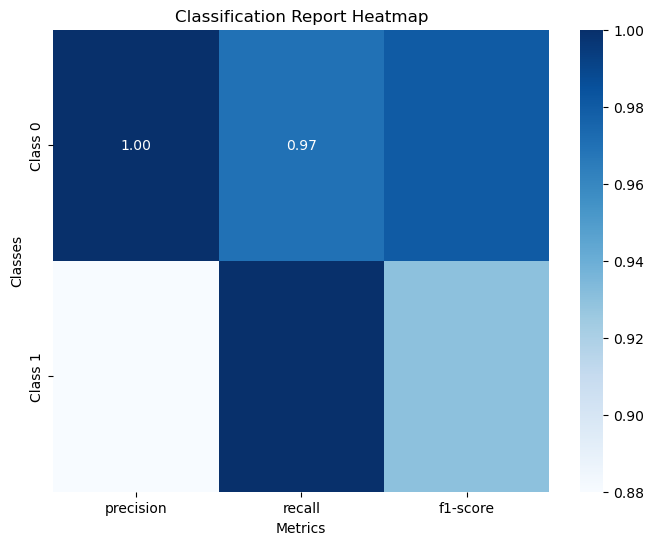

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Example classification report data
report_data = {
    'precision': [1.00, 0.88],
    'recall': [0.97, 1.00],
    'f1-score': [0.98, 0.93]
}

# Define the classes
classes = ['Class 0', 'Class 1']

# Convert the report data to a DataFrame
df_report = pd.DataFrame(report_data, index=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


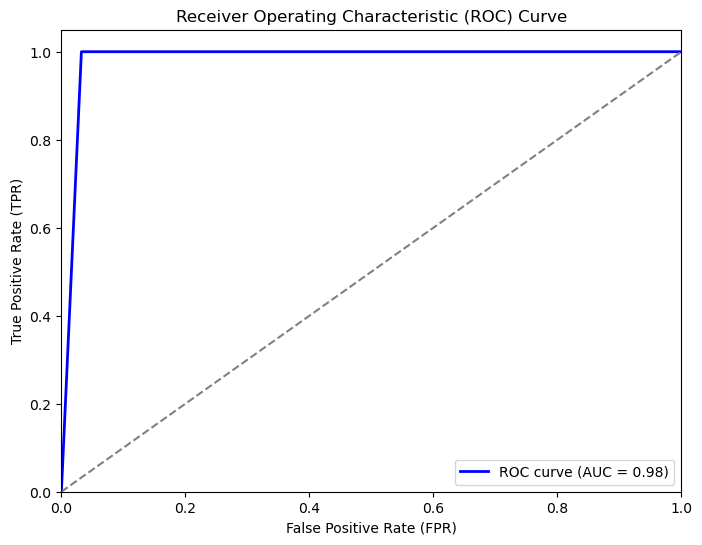

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and predictions are already defined
# y_test contains the true labels and predictions contains the predicted labels

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### ROC curve 

An SVM model with an ROC Curve (AUC) value of 0.98 indicates that the model has a high ability to distinguish between the positive and negative classes. This high AUC value suggests that the model performs exceptionally well in ranking and separating the classes, with a strong likelihood of correctly identifying positive instances as positive and negative instances as negative. Overall, the ROC Curve's AUC value of 0.98 reflects the model's outstanding discriminatory power and predictive performance.

In [22]:
import sys
print(sys.version)



3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
